In [1]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract
%matplotlib inline

In [3]:
filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

['pdf.ttf', 'tessconfigs', 'configs', 'ben.traineddata', 'eng.traineddata', 'osd.traineddata']


In [4]:
import shutil
src1 = 'ben.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src1, dest)

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

['pdf.ttf', 'tessconfigs', 'configs', 'ben.traineddata', 'eng.traineddata', 'osd.traineddata']


(600, 800, 3)


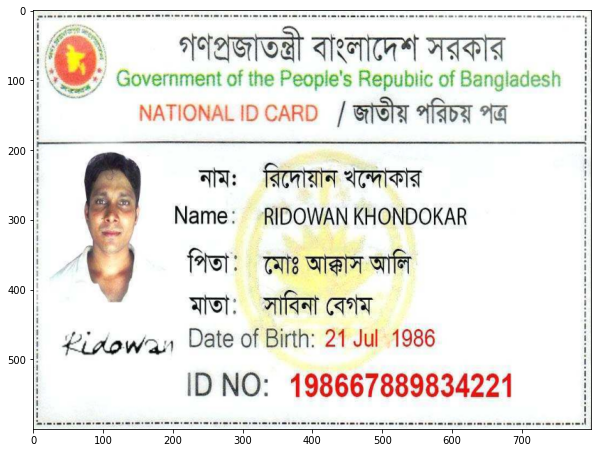

In [16]:
img2 = cv2.imread('demo.jpg')
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)
# img2= cv2.resize(img2,None, fx=.5, fy=0.5) #resizing the image
img2= cv2.resize(img2,(800,600))
print(img2.shape)
fig= plt.figure(figsize= [10,10])
plt.imshow(img2)

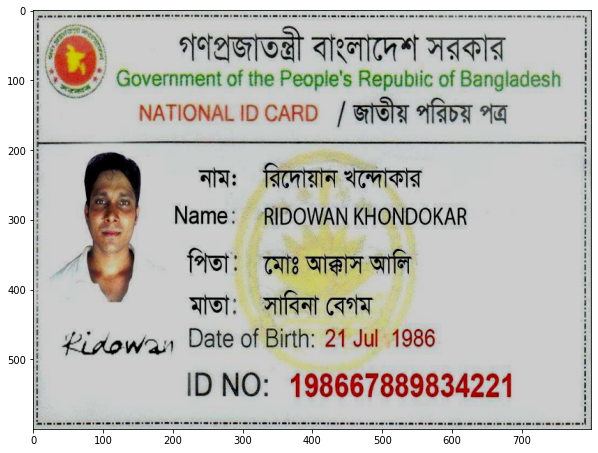

In [17]:
alpha = 1.0
beta = -50

new = alpha * img2 + beta
new = np.clip(new, 0, 255).astype(np.uint8)

cv2.imwrite("new.jpg", new)
fig= plt.figure(figsize= [10,10])
plt.imshow(new)

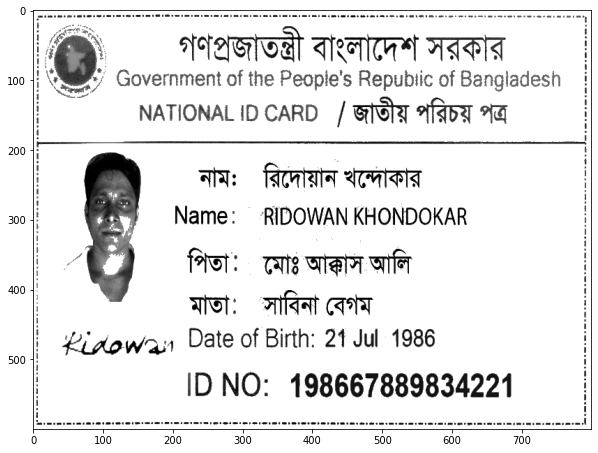

In [18]:
img2 = cv2.imread('new.jpg')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)   # converting image to grayscale
gray[gray > 150] = 255
fig = plt.figure(figsize= [10,10])
# plt.imshow(gray,cmap='gray', vmin=0, vmax=255) 
plt.imshow(gray,cmap='gray', vmin=0, vmax=255)

True

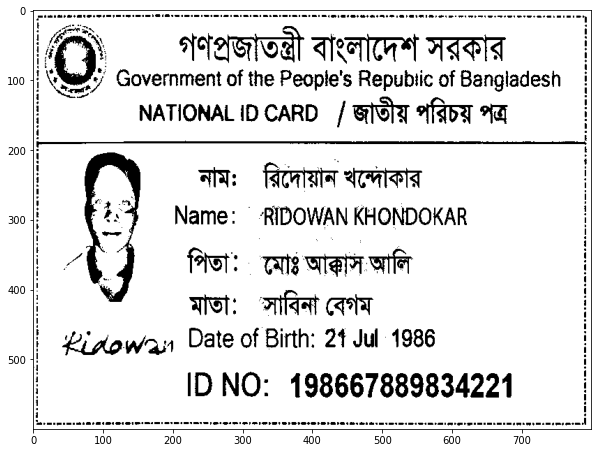

In [21]:
adaptive_threshold = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,85,50)
fig = plt.figure(figsize= [10,10])
plt.imshow(adaptive_threshold,cmap='gray', vmin=0, vmax=255)
cv2.imwrite("1.jpg", adaptive_threshold)

In [22]:
text3 = pytesseract.image_to_string(adaptive_threshold,lang='ben')
print(text3)

  

Ws

i
i
i
i
i
i

 

Govern

 

গণপ্রজাতন্ত্রী বাংলাদেশ সরকার

নাম: রিদোয়ান খন্দৌকার
Name: — RIDOWAN KHONDOKAR
পিতা: . মোঃ আক্কাস আলি
মাতা: সাবিনা বেগম

| ০৮৯ Date of Birth: 2 Jul 1986

    

ID NO: 198667889834221

 

ment of the People's Repubtic of Bangladesh i
NATIONAL ID CARD / জাতীয় পরিচয় পত্র

i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i

saccades মম মলম i



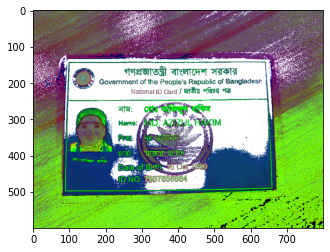

In [10]:
## tried to change hsv

img= cv2.cvtColor(img2 , cv2.COLOR_BGR2HSV)
img=np.copy(img)
light=np.where((img[:,:,1]<=100) & (img[:,:,2]>=130))
img[light]=(255,255,255)
plt.imshow(img)

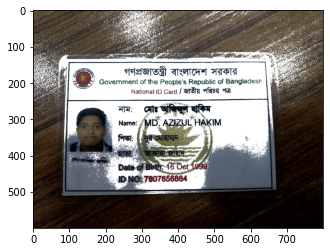

In [11]:
## tried to change rgb
img=np.copy(img2)
light=np.where((img[:,:,0]>=100) & (img[:,:,1]>=100) & (img[:,:,2]>=100))
# dark=np.where((img[:,:,0]<=150) & (img[:,:,1]<=150) & (img[:,:,2]<=150))

img[light]=(255,255,255)
plt.imshow(img)